## MODELS UNPOOLED, HIERARCHICAL

#### Plot the distribution of the data

In [1]:
import pandas as pd
import os
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('cleaned_football_data.csv')

# Split data by league and season
serie_a_data = data[data['League'] == 'Serie A']
pl_data = data[data['League'] == 'Premier League']

display(serie_a_data.head())
display(pl_data.head())

Div        Date    HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
3040  I1  24/08/2019       Parma  Juventus     0     1   A   0.0   1.0   A   
3041  I1  24/08/2019  Fiorentina    Napoli     3     4   A   1.0   2.0   A   
3042  I1  25/08/2019     Udinese     Milan     1     0   H   0.0   0.0   D   
3043  I1  25/08/2019    Cagliari   Brescia     0     1   A   0.0   0.0   D   
3044  I1  25/08/2019        Roma     Genoa     3     3   D   2.0   2.0   D   

      ...  AvgA  PSCH  PSCD  PSCA  Season   League      LBH       LBD  \
3040  ...  1.31  9.60  5.20  1.37    2019  Serie A  2.87875  4.095724   
3041  ...  1.76  4.52  3.72  1.85    2019  Serie A  2.87875  4.095724   
3042  ...  2.06  4.03  3.43  2.04    2019  Serie A  2.87875  4.095724   
3043  ...  4.45  1.83  3.67  4.75    2019  Serie A  2.87875  4.095724   
3044  ...  7.13  1.75  3.69  5.32    2019  Serie A  2.87875  4.095724   

           LBA  HomeWin  
3040  5.192526        0  
3041  5.192526        0  
3042  5.192526        1  
3043  5.192526        0  
3044  5.192526        0  

[5 rows x 55 columns]

Div        Date        HomeTeam          AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  09/08/2019       Liverpool           Norwich     4     1   H   4.0   
1  E0  10/08/2019        West Ham          Man City     0     5   A   0.0   
2  E0  10/08/2019     Bournemouth  Sheffield United     1     1   D   0.0   
3  E0  10/08/2019         Burnley       Southampton     3     0   H   0.0   
4  E0  10/08/2019  Crystal Palace           Everton     0     0   D   0.0   

   HTAG HTR  ...   AvgA   PSCH   PSCD   PSCA  Season          League  \
0   0.0   H  ...  19.83   1.14  10.43  19.63    2019  Premier League   
1   1.0   A  ...   1.25  11.11   6.68   1.27    2019  Premier League   
2   0.0   D  ...   3.83   1.98   3.67   4.06    2019  Premier League   
3   0.0   D  ...   2.78   2.71   3.19   2.90    2019  Premier League   
4   0.0   D  ...   2.40   3.37   3.45   2.27    2019  Premier League   

        LBH       LBD       LBA  HomeWin  
0  2.953658  4.099487  5.155421        1  
1  2.953658  4.099487  5.155421        0  
2  2.953658  4.099487  5.155421        0  
3  2.953658  4.099487  5.155421        1  
4  2.953658  4.099487  5.155421        0  

[5 rows x 55 columns]

In [2]:
data['goals_per_match'] = data['FTHG'] + data['FTAG']

In [3]:
goals_per_match_mean = data[['FTHG', 'FTAG']].mean(axis=1)
goals_per_match_std = data[['FTHG', 'FTAG']].std(axis=1)

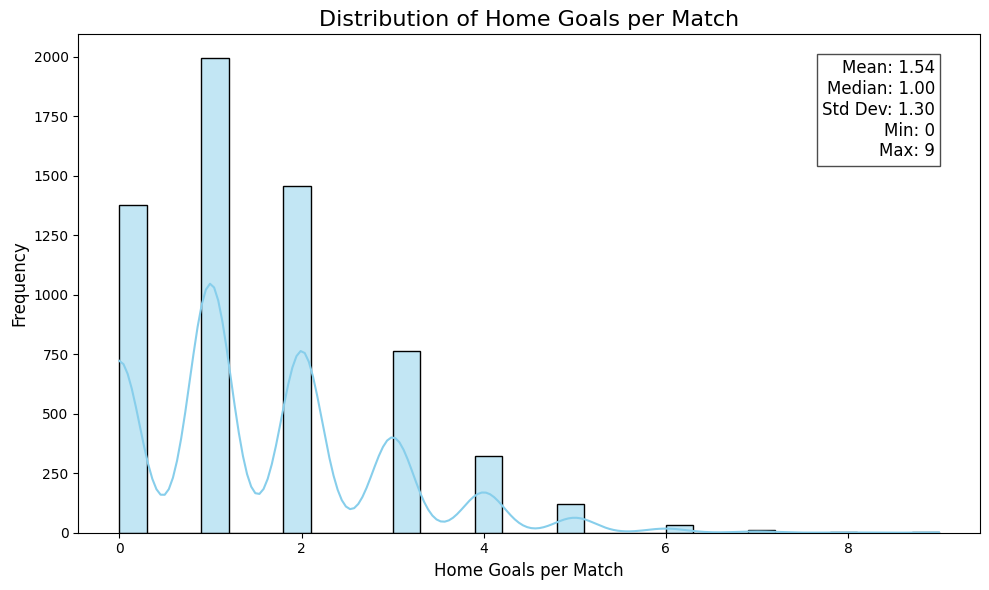

In [236]:
plt.figure(figsize=(10, 6))
home_goals = data["FTHG"]  # Assuming 'FTHG' is the column for home goals

sns.histplot(home_goals, kde=True, color='skyblue', bins=30)

# Adding titles and labels
plt.title('Distribution of Home Goals per Match', fontsize=16)
plt.xlabel('Home Goals per Match', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Calculating and displaying interesting statistics
mean_home_goals = np.mean(home_goals)
std_home_goals = np.std(home_goals)
median_home_goals = np.median(home_goals)
min_home_goals = np.min(home_goals)
max_home_goals = np.max(home_goals)

# Displaying the stats on the plot
stats_text = f'Mean: {mean_home_goals:.2f}\nMedian: {median_home_goals:.2f}\nStd Dev: {std_home_goals:.2f}\nMin: {min_home_goals}\nMax: {max_home_goals}'
plt.text(0.95, 0.95, stats_text, horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Show the plot
plt.tight_layout()
plt.show()


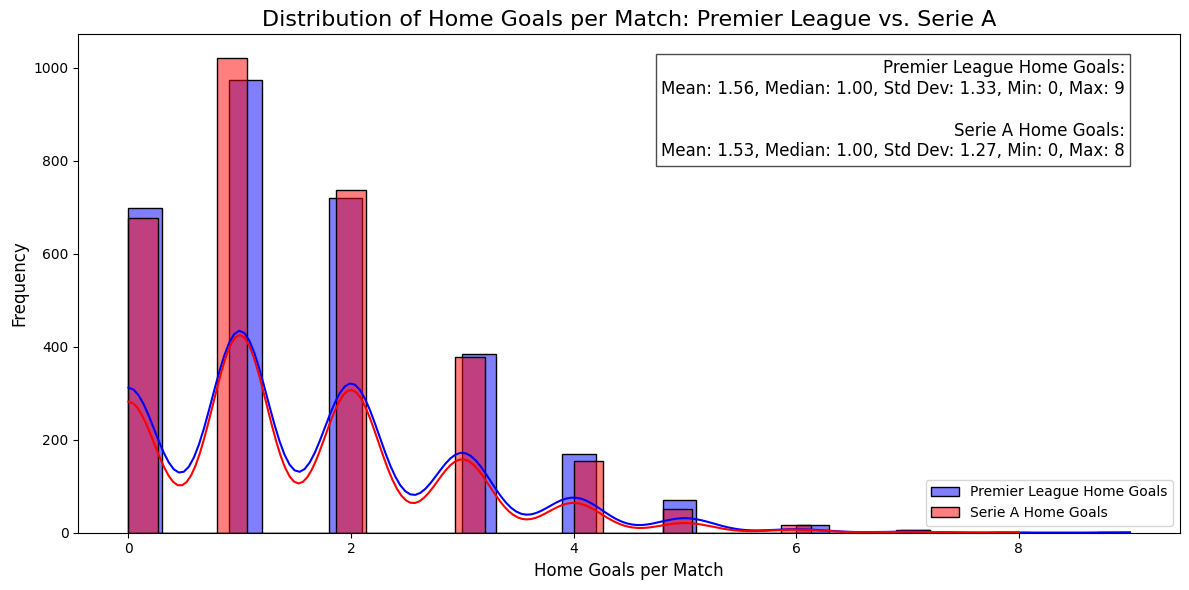

In [237]:
# Calculate home goals for Premier League and Serie A
pl_home_goals = pl_data['FTHG']
serie_a_home_goals = serie_a_data['FTHG']

# Calculate statistics for Premier League home goals
pl_mean_home_goals = pl_home_goals.mean()
pl_median_home_goals = pl_home_goals.median()
pl_std_home_goals = pl_home_goals.std()
pl_min_home_goals = pl_home_goals.min()
pl_max_home_goals = pl_home_goals.max()

# Calculate statistics for Serie A home goals
serie_a_mean_home_goals = serie_a_home_goals.mean()
serie_a_median_home_goals = serie_a_home_goals.median()
serie_a_std_home_goals = serie_a_home_goals.std()
serie_a_min_home_goals = serie_a_home_goals.min()
serie_a_max_home_goals = serie_a_home_goals.max()

# Plotting the distribution of home goals per match for Premier League and Serie A
plt.figure(figsize=(12, 6))
sns.histplot(pl_home_goals, kde=True, color='blue', label='Premier League Home Goals', bins=30)
sns.histplot(serie_a_home_goals, kde=True, color='red', label='Serie A Home Goals', bins=30)

# Adding titles and labels
plt.title('Distribution of Home Goals per Match: Premier League vs. Serie A', fontsize=16)
plt.xlabel('Home Goals per Match', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Displaying the stats on the plot
stats_text = f'Premier League Home Goals:\nMean: {pl_mean_home_goals:.2f}, Median: {pl_median_home_goals:.2f}, Std Dev: {pl_std_home_goals:.2f}, Min: {pl_min_home_goals}, Max: {pl_max_home_goals}\n\nSerie A Home Goals:\nMean: {serie_a_mean_home_goals:.2f}, Median: {serie_a_median_home_goals:.2f}, Std Dev: {serie_a_std_home_goals:.2f}, Min: {serie_a_min_home_goals}, Max: {serie_a_max_home_goals}'
plt.text(0.95, 0.95, stats_text, horizontalalignment='right', verticalalignment='top',
            transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Show the plot
plt.tight_layout()
plt.show()


#### Choice of the prior based on online checks

- link to source Serie A: [soccerzz.com](https://www.soccerzz.com/competition/serie-a/10/stats)
- link to source Premier League: [soccerzz.com](https://www.soccerzz.com/competition/premier-league/4/stats)


The general average for home team goals in European football leagues tends to range from 0 to 3.5 goals per game.

μ + 2$\sigma$ = 3.5

1.75 + 2$\sigma$ = 3.5

$\sigma$ = $\frac{1.75}{2}$ = 0.875


In [7]:
goals_per_match_mean = 1.75
# using 2 std range
goals_per_match_std = 0.875

# The resulting Unpooled model
\begin{equation}
\begin{array}{lrl}
& \lambda_{\text{teams}} & \sim HN(1.2) \; \text{(Poisson rate for each teams group)} \\
\\
& y_{ij} & \sim \text{Poisson}(\lambda_{\text{teams}}) \; \text{(observed goals for each match in each group)} \\
\end{array}
\end{equation}


In [8]:
# prior predictive check to set the sigma of unpooled model
from scipy.stats import norm, halfnorm

# return the percentile 1, 55, 99 of the sampled data.
def test_sigma(half_normal_scale):
  mu_s = norm.rvs(loc = 1.75, scale = 0.875, size = 10000)
  s_s = halfnorm.rvs(scale = half_normal_scale, size = 10000)
  y_s = norm.rvs(loc = mu_s, scale = s_s)
  pc = np.percentile(y_s, q=np.array([1,  50, 99]))
  return pc

# the sigma of the pooled model yields too many values outside the domain
print("scale = 0.3: " + str(test_sigma(half_normal_scale=0.3))) # too small
print("scale = 1.5: " + str(test_sigma(half_normal_scale=1.5))) # too large
print("scale = 1.2: " + str(test_sigma(half_normal_scale=1.2))) # ok
print("scale = 0.875: " + str(test_sigma(half_normal_scale=0.875))) # ok


scale = 0.3: [-0.39015207  1.74028088  3.8843187 ]
scale = 1.5: [-3.05918344  1.75332988  6.55416988]
scale = 1.2: [-2.38289887  1.74729308  5.67717193]
scale = 0.875: [-1.32650398  1.7475348   4.84175512]


In [9]:
# Group the data by team (HomeTeam)
grouped_data = data.groupby('HomeTeam')['FTHG']
with pm.Model() as unpooled_model:
    lambda_dict = {}

    # Loop through each group (team)
    for team, group_data in grouped_data:
        # Prior for the Poisson rate (lambda) for each team
        lambda_dict[team] = pm.HalfNormal(team, sigma=1.2)

        # Likelihood for the goals in each match for each team (Poisson distribution)
        pm.Poisson(f'y_{team}', mu=lambda_dict[team], observed=group_data)

    # Sampling from the model
    unpooled_trace = pm.sample(10_000)


Output()

Output()

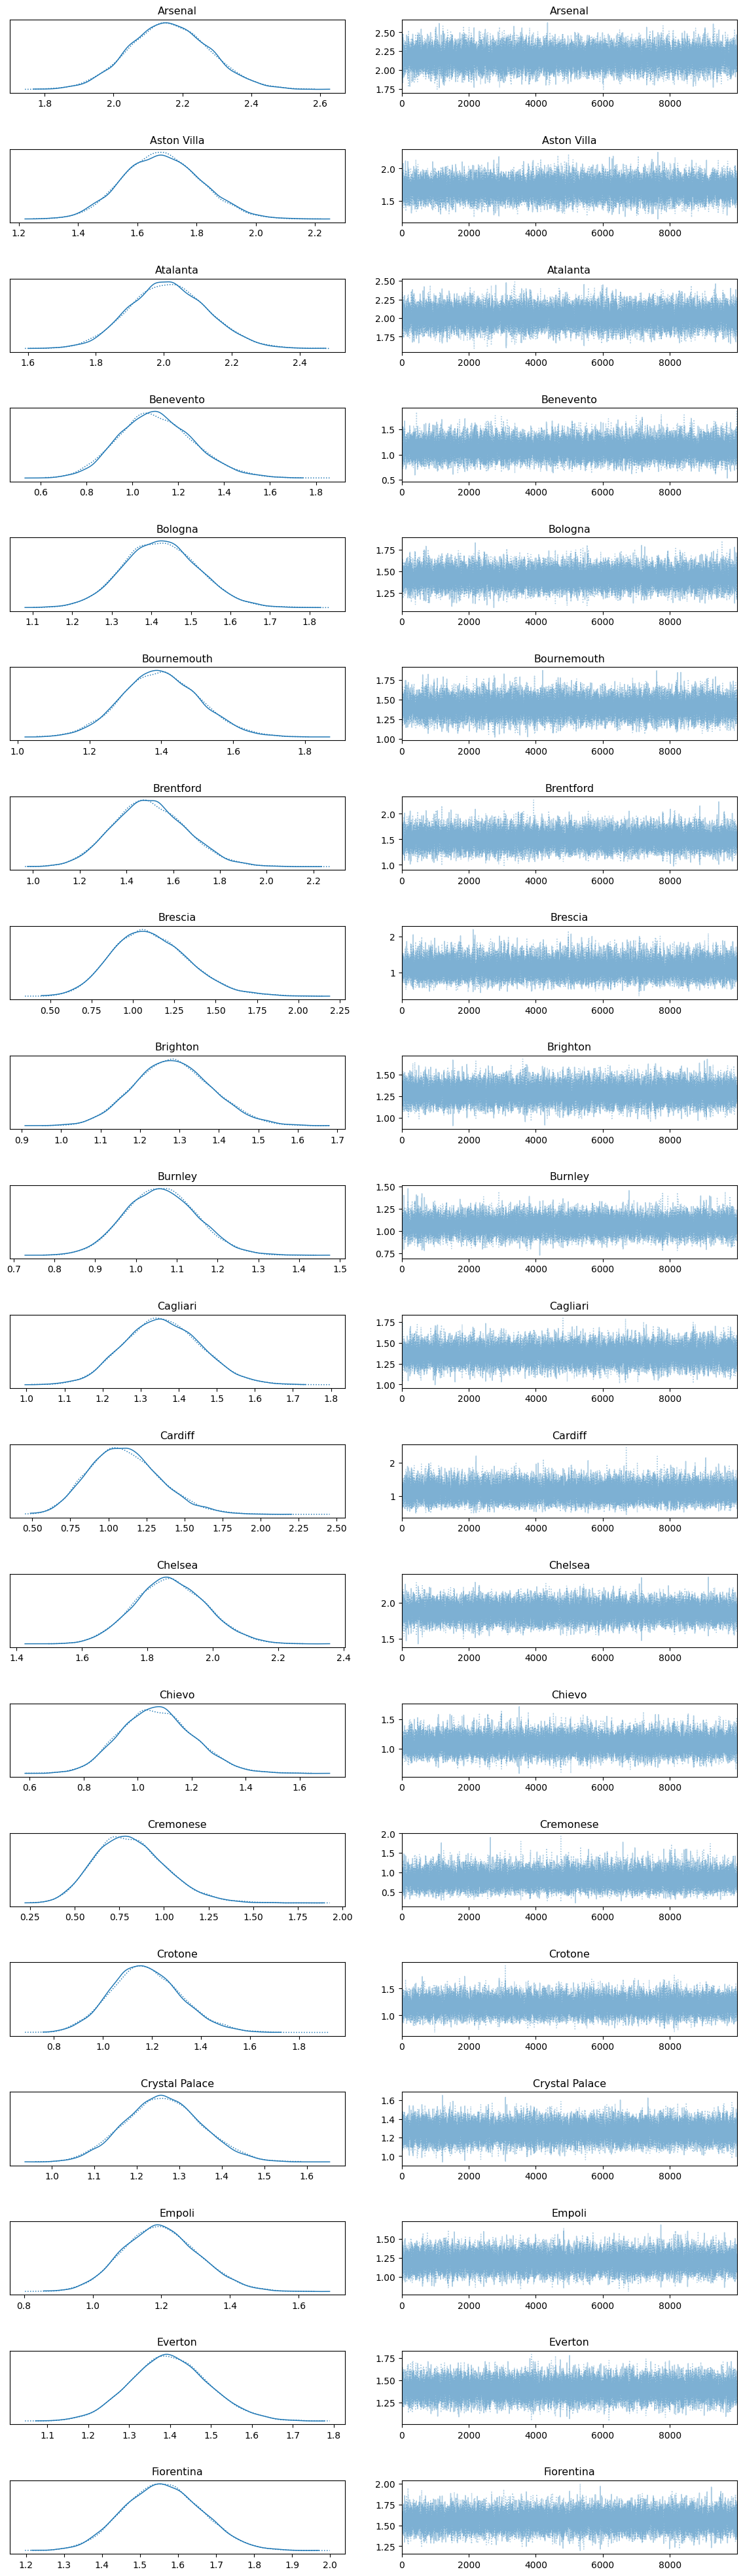

<Figure size 1200x800 with 0 Axes>

In [172]:
pm.plot_trace(unpooled_trace)
plt.tight_layout(pad=3.0)  # pad increases space between plots
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [11]:
pm.summary(unpooled_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Arsenal      2.162  0.117   1.935    2.376      0.001    0.000   43376.0   
Aston Villa  1.684  0.131   1.444    1.935      0.001    0.000   43576.0   
Atalanta     2.014  0.117   1.801    2.236      0.001    0.000   38774.0   
Benevento    1.108  0.166   0.789    1.412      0.001    0.001   47848.0   
Bologna      1.425  0.096   1.239    1.599      0.000    0.000   41662.0   
...            ...    ...     ...      ...        ...      ...       ...   
Verona       1.228  0.102   1.042    1.425      0.001    0.000   38673.0   
Watford      1.230  0.112   1.014    1.435      0.001    0.000   36760.0   
West Brom    1.108  0.136   0.861    1.373      0.001    0.001   38929.0   
West Ham     1.490  0.100   1.308    1.680      0.001    0.000   36110.0   
Wolves       1.236  0.104   1.043    1.429      0.000    0.000   43251.0   

             ess_tail  r_hat  
Arsenal       14742.0    1.0  
Aston Villa   14613.0    1.0  
Atalanta      14737.0    1.0  
Benevento     14789.0    1.0  
Bologna       14664.0    1.0  
...               ...    ...  
Verona        13526.0    1.0  
Watford       14788.0    1.0  
West Brom     14234.0    1.0  
West Ham      14624.0    1.0  
Wolves        14882.0    1.0  

[65 rows x 9 columns]

In [ ]:
unpooled_trace

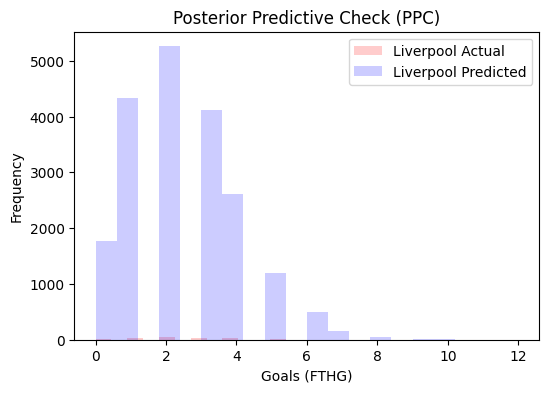

In [219]:
posterior_lambda = unpooled_trace.posterior['lambda_team']
ppc_samples = {}
for i, team in enumerate(data['HomeTeam'].unique()):
    # Extract lambda samples for the current team
    lambda_samples = posterior_lambda[:, :, i].values  # shape (chains, draws)

    # Generate posterior predictive samples using the Poisson distribution
    ppc_samples[team] = np.random.poisson(lam=lambda_samples, size=(lambda_samples.shape[0], lambda_samples.shape[1]))

fig, ax = plt.subplots(figsize=(6, 4))
team_names = data['HomeTeam'].unique()
for team in team_names[:1]:
    actual_data = data[data['HomeTeam'] == team]['FTHG'].values
    ppc_data = ppc_samples[team].flatten()

    # Plot the histogram for observed and predictive data
    ax.hist(actual_data, bins=20, alpha=0.2, label=f'{team} Actual', color='red')
    ax.hist(ppc_data, bins=20, alpha=0.2, label=f'{team} Predicted', color='blue')

ax.set_xlabel('Goals (FTHG)')
ax.set_ylabel('Frequency')
ax.set_title('Posterior Predictive Check (PPC)')
plt.legend()
plt.show()


In [203]:
with unpooled_model:
    posterior_predictive_unpooled = pm.sample_posterior_predictive(unpooled_trace)

Output()

In [226]:
posterior_predictive_unpooled

Inference data with groups:
	> posterior_predictive
	> observed_data

<Figure size 1000x600 with 0 Axes>

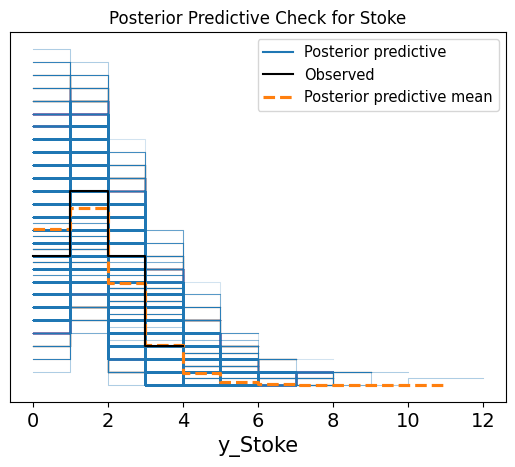

<Figure size 1000x600 with 0 Axes>

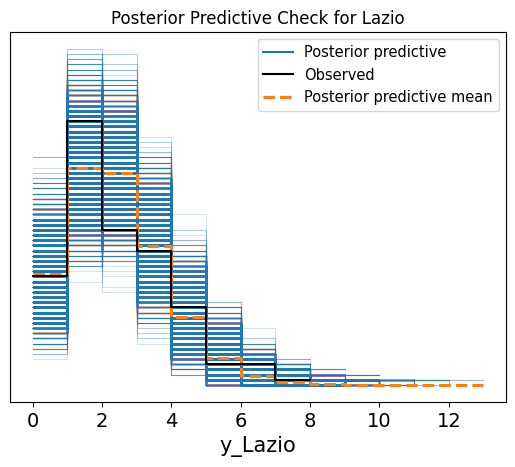

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

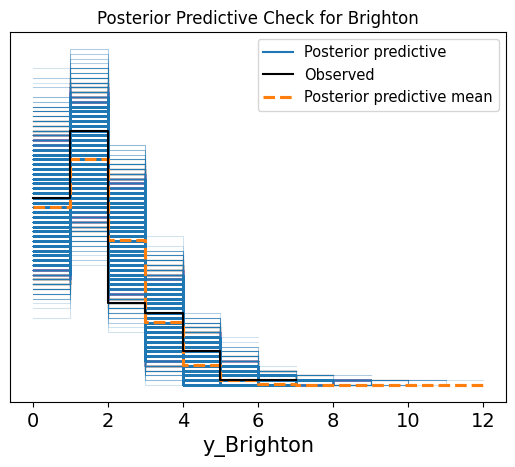

<Figure size 1000x600 with 0 Axes>

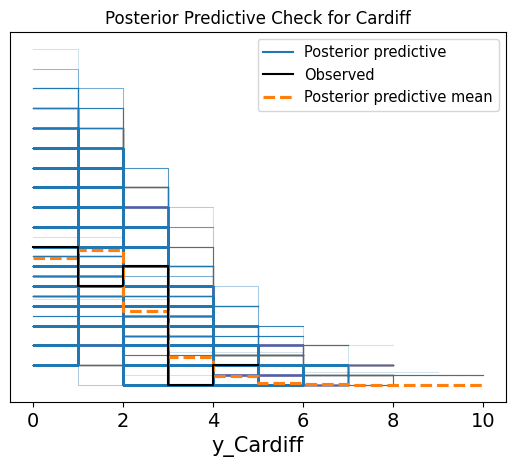

In [218]:
import random
random_teams = random.sample(list(data['HomeTeam'].unique()), 5)

# Plot the PPC for the selected random teams
for team in random_teams:
    plt.figure(figsize=(10, 6))
    az.plot_ppc(posterior_predictive_unpooled, var_names=[f'y_{team}'])
    plt.title(f'Posterior Predictive Check for {team}')
    plt.show()

# Hierarchical model

In this case, we want to account for differences between teams.

The idea is to model the goal counts for each team, while allowing for some "sharing" of information between teams based on their historical performance (across seasons).


In [12]:
goals_per_match_mean = data["FTHG"].mean()
goals_per_match_std = data["FTHG"].std()

# Calculate team-level mean and standard deviation
team_stats = data.groupby("HomeTeam")["FTHG"].agg(["mean", "std"]).reset_index()
team_stats.rename(columns={"mean": "team_mean", "std": "team_std"}, inplace=True)

goals_per_match_mean, goals_per_match_std

(1.5447368421052632, 1.303053696325317)

In [13]:
team_stats

HomeTeam  team_mean  team_std
0       Arsenal   2.177632  1.352466
1   Aston Villa   1.694737  1.305257
2      Atalanta   2.026316  1.565131
3     Benevento   1.105263  0.952648
4       Bologna   1.427632  1.131148
..          ...        ...       ...
60       Verona   1.228070  1.004724
61      Watford   1.231579  1.066438
62    West Brom   1.105263  1.128909
63     West Ham   1.493421  1.115791
64       Wolves   1.236842  0.989347

[65 rows x 3 columns]

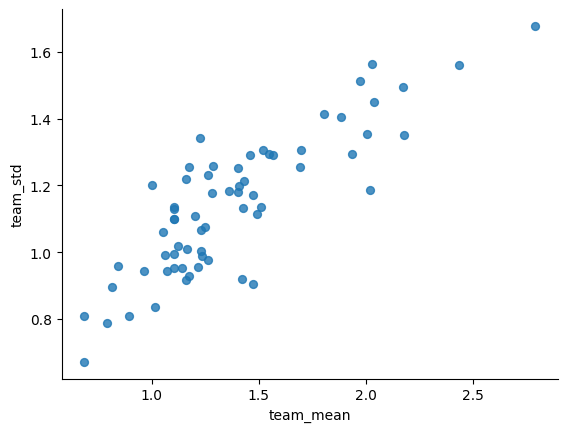

In [14]:
team_stats.plot(kind='scatter', x='team_mean', y='team_std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
global_mean = team_stats['team_mean'].mean()
global_std = team_stats['team_mean'].std()

global_mean, global_std

(1.3818498168498168, 0.4215682922842497)

In [16]:
from scipy.stats import halfnorm
pd.DataFrame(halfnorm.rvs(scale=1.2, size=10000)).describe()

0
count  10000.000000
mean       0.956508
std        0.726388
min        0.000172
25%        0.383812
50%        0.800701
75%        1.381898
max        4.789185

# The resulting hierarchical model


\begin{aligned}
    \mu_{\text{global}} &\sim \mathcal{N}(1.75, 0.875) \quad &\text{(global mean for home team goals)} \\
    \sigma_{\text{global}} &\sim \text{HalfNormal}(1.2) \quad &\text{(global variability for team-level means)} \\
    \lambda_j &\sim \mathcal{N}(\mu_{\text{global}}, \sigma_{\text{global}}) \quad &\text{(team-specific Poisson rate)} \\
    y_{ij} &\sim \text{Poisson}(\lambda_j) \quad &\text{(observed goals for each match of team \( j \))}
\end{aligned}



In [147]:
import pymc as pm

# Group the data by team (HomeTeam)
grouped_data = data.groupby('HomeTeam')['FTHG']
with pm.Model() as hierarchical_model:
    # Global prior for the mean home goals (for all teams)
    mu_global = pm.Normal('mu_global', mu=1.75, sigma=0.875)  # Global mean for home team goals

    # Global standard deviation for team-level variability
    sigma_global = pm.HalfNormal('sigma_global', sigma=1.2)  # Global std for variability across teams

    # Team-specific Poisson rates (lambda)
    lambda_dict = {}
    for team, group_data in grouped_data:
        # Each team-specific Poisson rate (lambda) drawn from a normal distribution around the global mean
        lambda_dict[team] = pm.Normal(
            f'lambda_{team}',
            mu=mu_global,
            sigma=sigma_global
        )

        # Now you can define the likelihood for the team-specific data, which is a Poisson distribution
        pm.Poisson(f'observed_{team}', mu=lambda_dict[team], observed=group_data.values)

    # Sampling from the model
    hierarchical_trace = pm.sample(10_000, return_inferencedata=True)



Output()

Output()

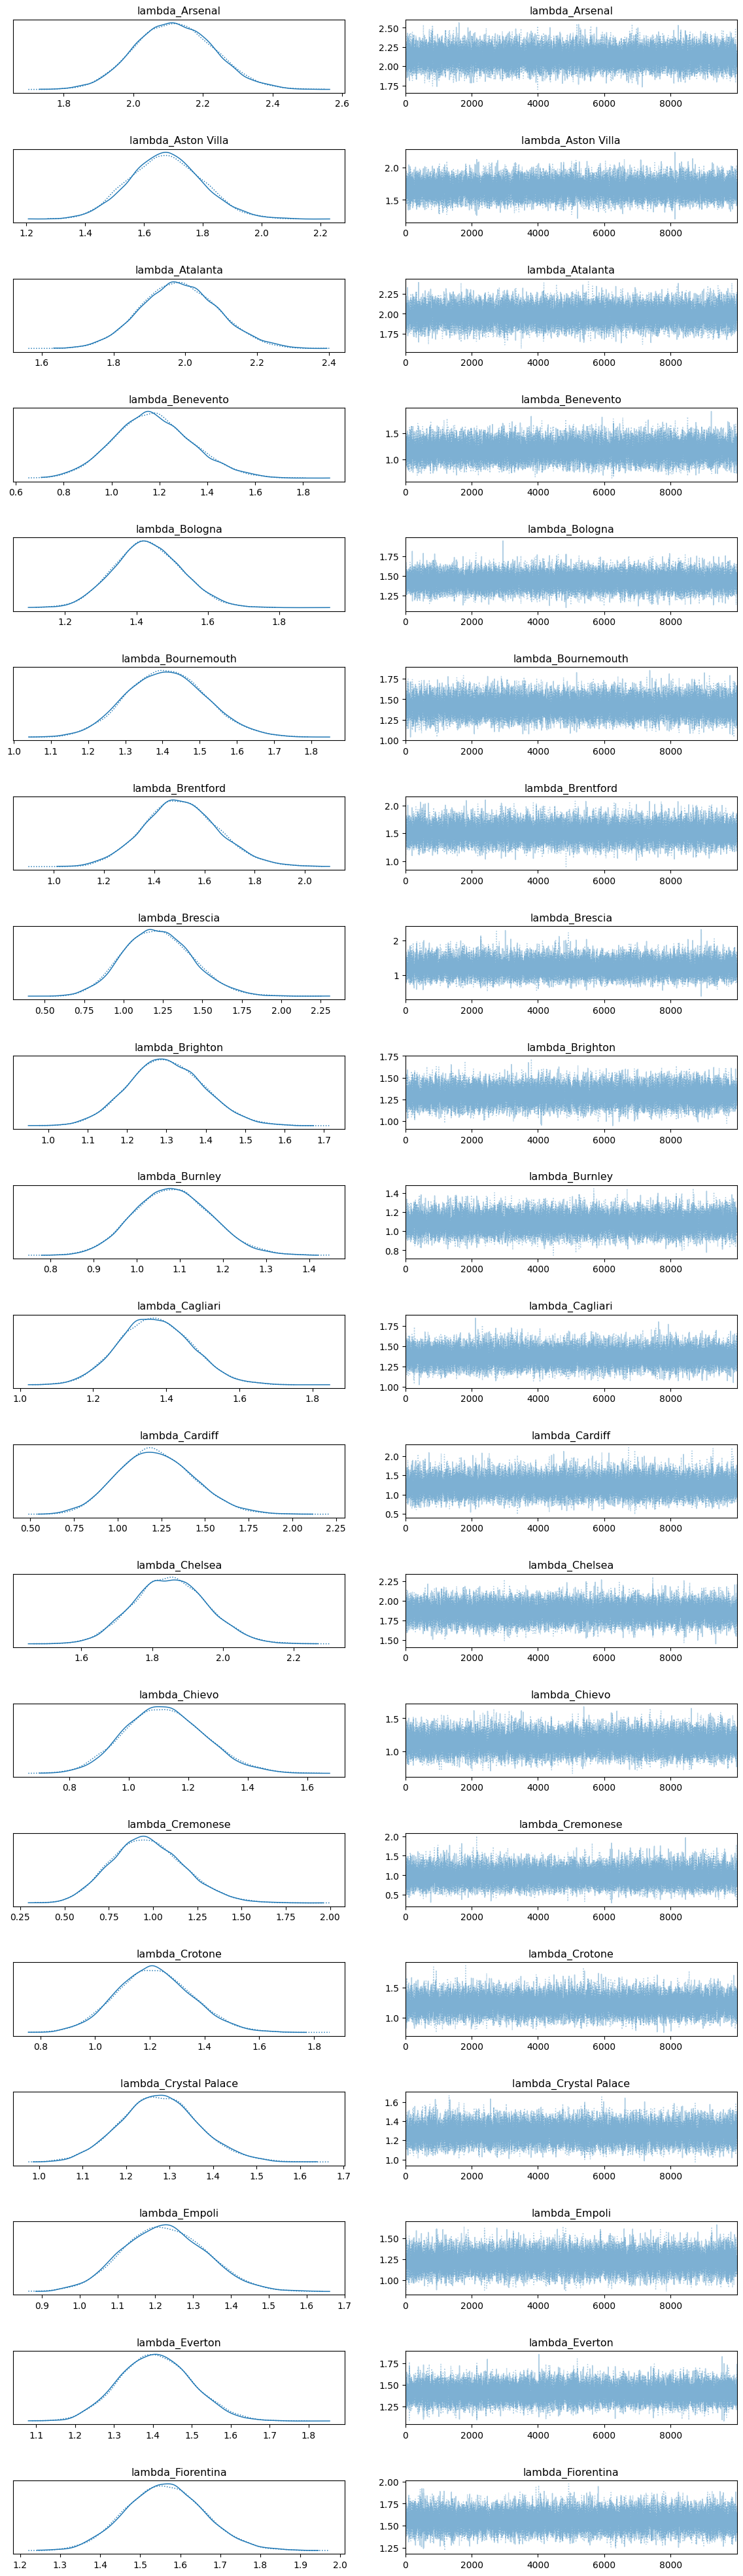

<Figure size 1200x800 with 0 Axes>

In [148]:
# Summarize and visualize the results
az.summary(hierarchical_trace)
az.plot_trace(hierarchical_trace)
plt.tight_layout(pad=3.0)  # pad increases space between plots
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [146]:
pm.summary(hierarchical_trace, hdi_prob=0.95)

mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu_global     1.545  0.017     1.511      1.577        0.0      0.0   20398.0   
sigma_global  1.303  0.012     1.279      1.326        0.0      0.0   18334.0   

              ess_tail  r_hat  
mu_global      14757.0    1.0  
sigma_global   14384.0    1.0

We conducted a hierarchical analysis of home goals in football matches, using a model that estimates both a global mean and variability in the Poisson rate of goals for each team. The global mean (`mu_global`) of home goals was estimated at 1.545, with a narrow credible interval of [1.511, 1.577], suggesting a precise estimate of the average number of home goals across all teams. The global standard deviation (`sigma_global`), which reflects the variability in home goals across teams, was estimated to be 1.303, with a credible interval of [1.279, 1.326]. This indicates moderate variability between teams in their home goal performance. In summary, the hierarchical model provides reliable insights into the overall home goals rate, while accounting for team-specific variations, and the model converged well with strong posterior distributions.

In [158]:
import arviz as az

# Convert trace to a dataset for easier querying
posterior = hierarchical_trace.posterior

# Access the keys (parameter names) from the posterior to identify the team-specific lambdas
lambda_keys = [key for key in posterior.data_vars if key.startswith('lambda_')]

# Create a dictionary to map team names to their respective indices
# This depends on how the data was processed and teams were indexed in your model
team_names = data['HomeTeam'].unique()  # List of unique team names
team_idx = {team: idx for idx, team in enumerate(team_names)}  # Mapping team names to indices

# Function to get posterior distribution for a specific team by name
def get_team_lambda_distribution(team_name):
    if team_name not in team_idx:
        raise ValueError(f"Team '{team_name}' not found in the dataset.")

    # Select the lambda samples for the specific team
    # The key will be 'lambda_{team_name}' (e.g., 'lambda_Arsenal')
    lambda_team_samples = posterior[f'lambda_{team_name}']

    return lambda_team_samples

# Example: Get posterior distribution for a specific team
team_name = "Arsenal"  # Replace with a team name from your data
team_lambda_dist = get_team_lambda_distribution(team_name)

# Calculate posterior mean and standard deviation for this team's goal rate (lambda)
posterior_mean = team_lambda_dist.mean().values
posterior_std = team_lambda_dist.std().values

# Print out the posterior mean and standard deviation for the team
print(f"Posterior mean for {team_name}'s lambda: {posterior_mean}")
print(f"Posterior standard deviation for {team_name}'s lambda: {posterior_std}")


Posterior mean for Arsenal's lambda: 2.1190835993619044
Posterior standard deviation for Arsenal's lambda: 0.11298465147797387


In [159]:
team_name = "Watford"  # Replace with a team name from your data
team_lambda_dist = get_team_lambda_distribution(team_name)
print(f"Posterior mean for {team_name}: {team_lambda_dist.mean().values}")
print(f"Posterior standard deviation for {team_name}: {team_lambda_dist.std().values}")


Posterior mean for Watford: 1.254574996084705
Posterior standard deviation for Watford: 0.11082539316495875


In [160]:
# Posterior summary
summary = pm.summary(hierarchical_trace)
display(summary)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
lambda_Arsenal      2.119  0.113   1.909    2.331      0.001    0.000   
lambda_Aston Villa  1.674  0.125   1.436    1.903      0.001    0.000   
lambda_Atalanta     1.985  0.108   1.794    2.201      0.001    0.000   
lambda_Benevento    1.174  0.164   0.868    1.489      0.001    0.001   
lambda_Bologna      1.432  0.095   1.257    1.612      0.000    0.000   
...                   ...    ...     ...      ...        ...      ...   
lambda_West Brom    1.153  0.136   0.900    1.407      0.001    0.001   
lambda_West Ham     1.494  0.096   1.309    1.672      0.001    0.000   
lambda_Wolves       1.255  0.102   1.072    1.450      0.001    0.000   
mu_global           1.410  0.053   1.308    1.509      0.000    0.000   
sigma_global        0.400  0.041   0.325    0.475      0.000    0.000   

                    ess_bulk  ess_tail  r_hat  
lambda_Arsenal       37209.0   15514.0    1.0  
lambda_Aston Villa   37535.0   14694.0    1.0  
lambda_Atalanta      33581.0   13190.0    1.0  
lambda_Benevento     23573.0   14302.0    1.0  
lambda_Bologna       38567.0   14273.0    1.0  
...                      ...       ...    ...  
lambda_West Brom     27503.0   13931.0    1.0  
lambda_West Ham      36380.0   14994.0    1.0  
lambda_Wolves        39814.0   14951.0    1.0  
mu_global            28933.0   15697.0    1.0  
sigma_global         26014.0   15968.0    1.0  

[67 rows x 9 columns]

array([[<Axes: title={'center': 'lambda_Arsenal'}>,
        <Axes: title={'center': 'lambda_Aston Villa'}>,
        <Axes: title={'center': 'lambda_Atalanta'}>,
        <Axes: title={'center': 'lambda_Benevento'}>],
       [<Axes: title={'center': 'lambda_Bologna'}>,
        <Axes: title={'center': 'lambda_Bournemouth'}>,
        <Axes: title={'center': 'lambda_Brentford'}>,
        <Axes: title={'center': 'lambda_Brescia'}>],
       [<Axes: title={'center': 'lambda_Brighton'}>,
        <Axes: title={'center': 'lambda_Burnley'}>,
        <Axes: title={'center': 'lambda_Cagliari'}>,
        <Axes: title={'center': 'lambda_Cardiff'}>],
       [<Axes: title={'center': 'lambda_Chelsea'}>,
        <Axes: title={'center': 'lambda_Chievo'}>,
        <Axes: title={'center': 'lambda_Cremonese'}>,
        <Axes: title={'center': 'lambda_Crotone'}>],
       [<Axes: title={'center': 'lambda_Crystal Palace'}>,
        <Axes: title={'center': 'lambda_Empoli'}>,
        <Axes: title={'center': 'lambd

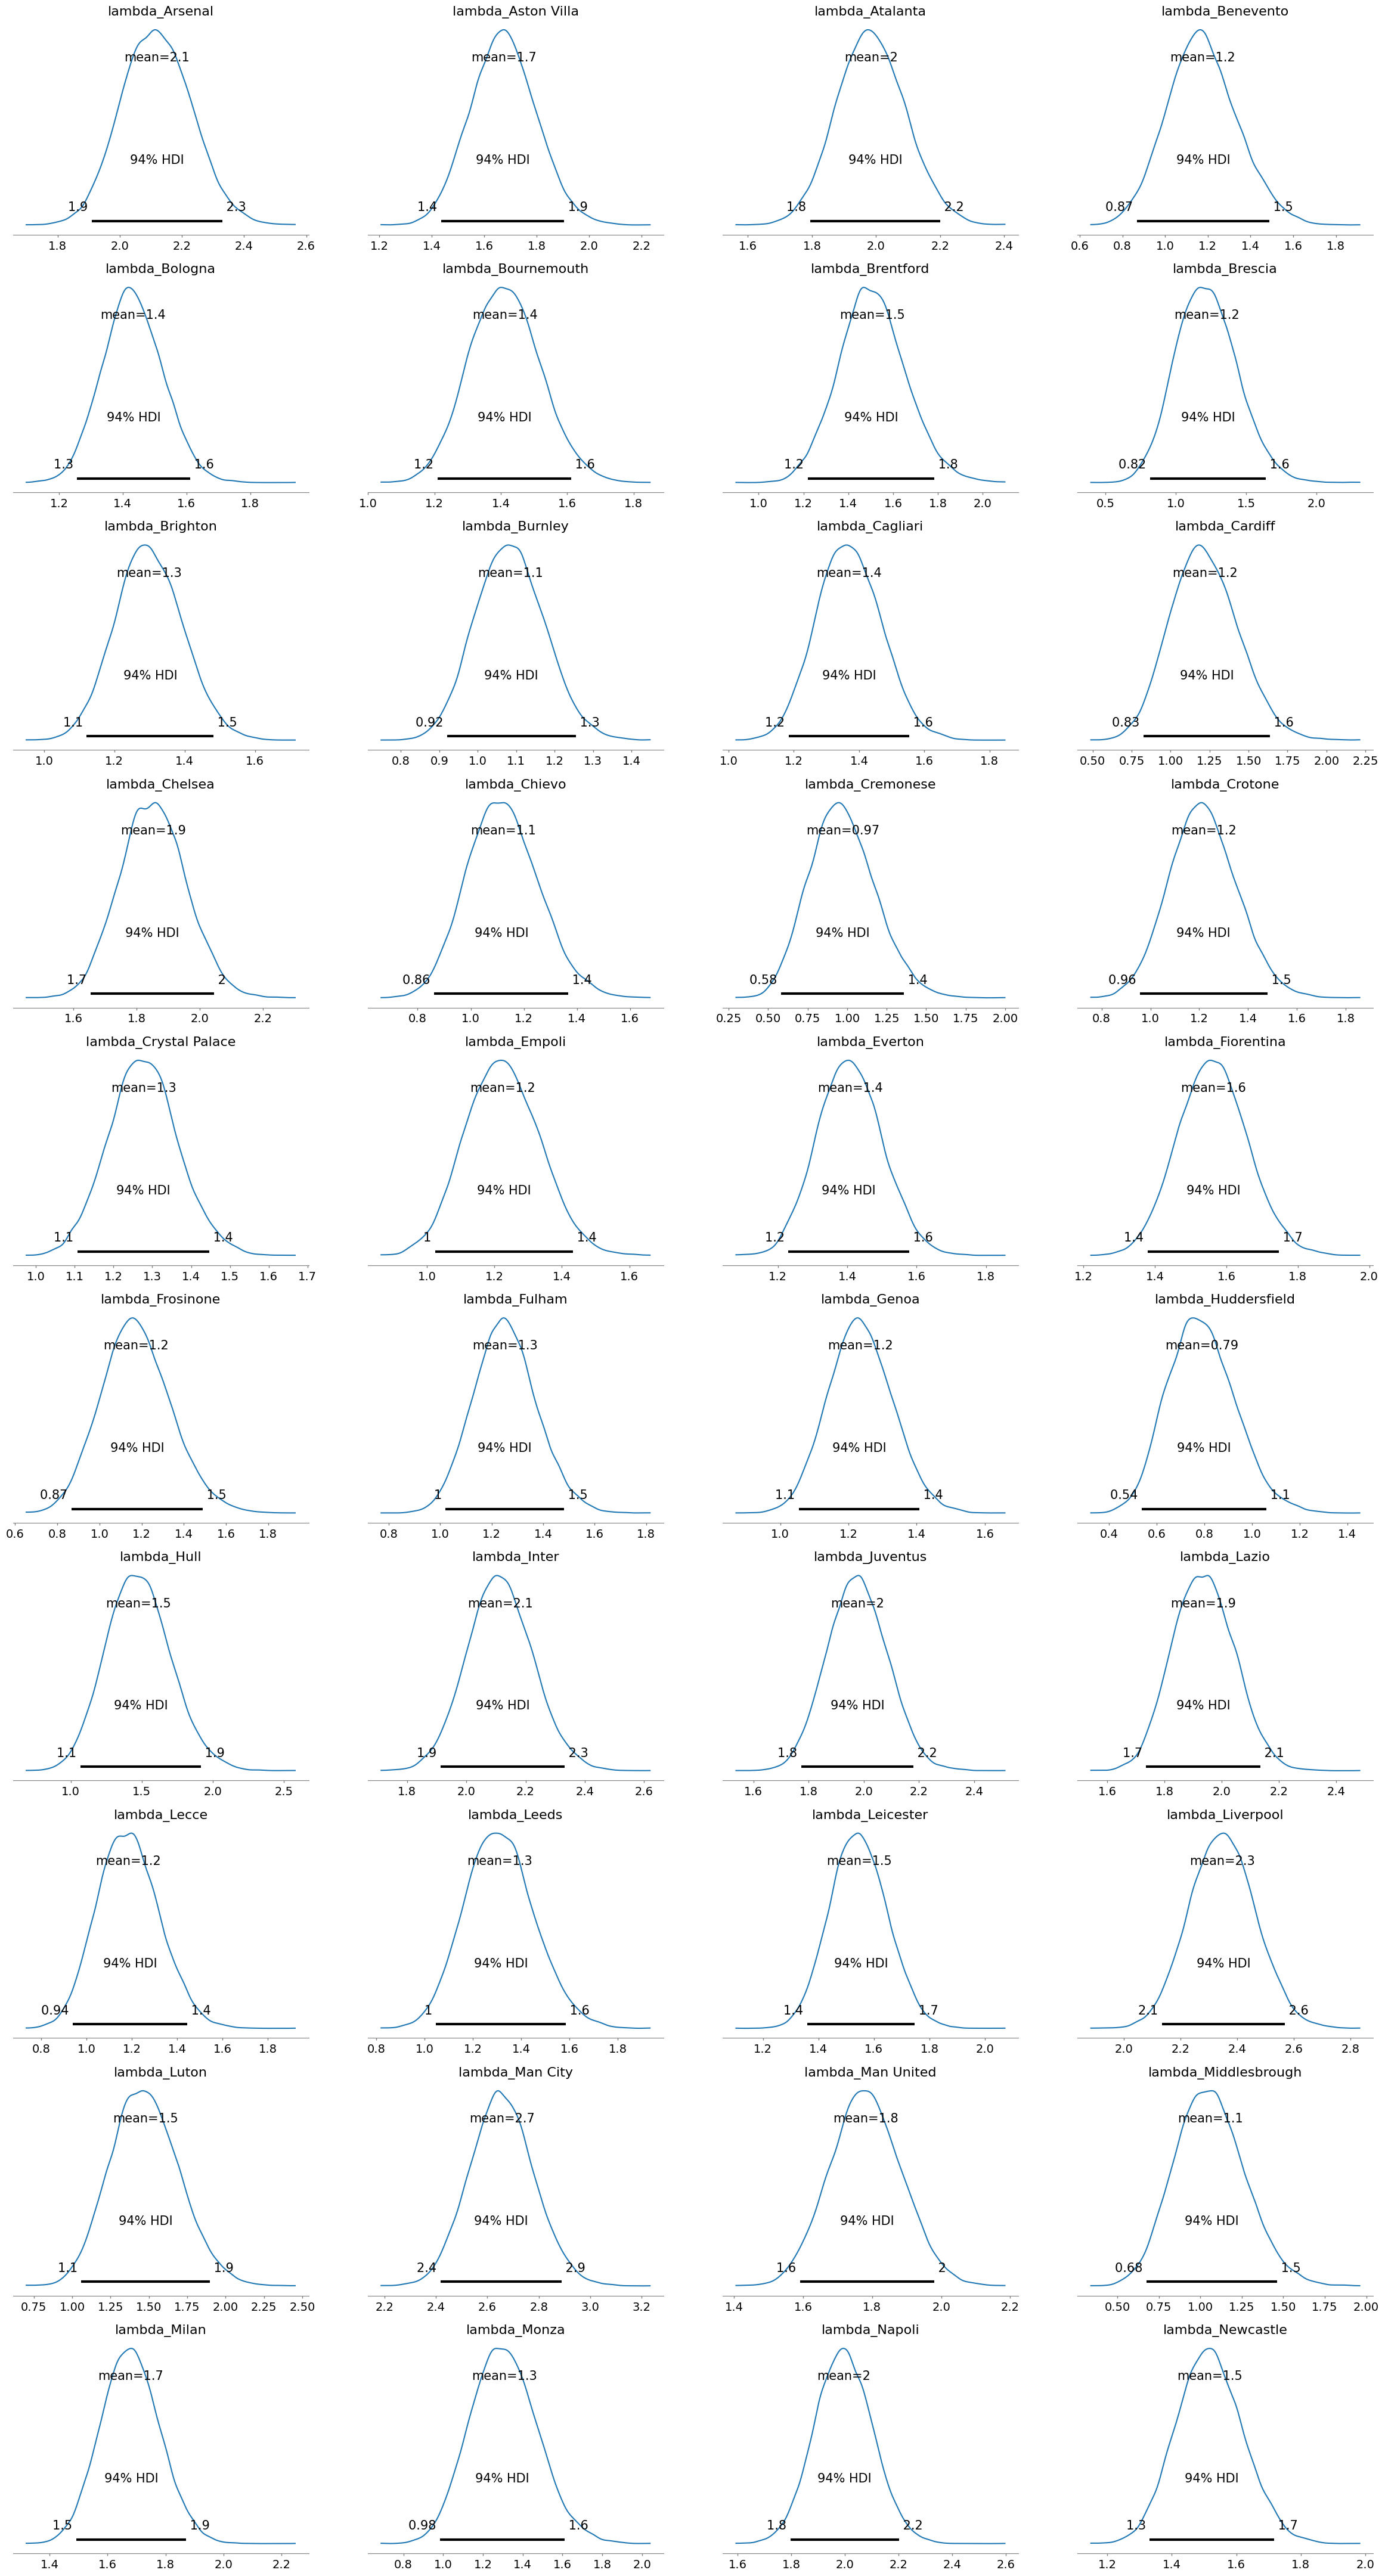

In [161]:
az.summary(hierarchical_trace)
az.plot_posterior(hierarchical_trace)

In [123]:
with hierarchical_model:
    posterior_predictive = pm.sample_posterior_predictive(hierarchical_trace)

Output()

In [163]:
predicted_goals = posterior_predictive["posterior_predictive"]
predicted_goals = predicted_goals['y_obs']

In [164]:
from bokeh.io import output_notebook, show
output_notebook()

<Figure size 1000x600 with 0 Axes>

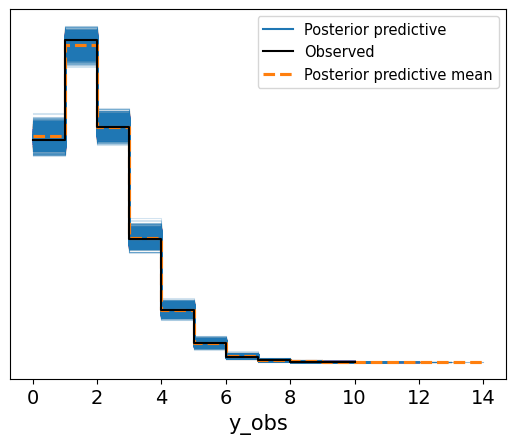

In [165]:
plt.figure(figsize=(10, 6))
az.plot_ppc(posterior_predictive, var_names=["y_obs"])
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
az.plot_ppc(posterior_predictive, var_names=["y_obs"], backend="bokeh")
plt.show()

In [153]:
# Prepare the traces to access using names and assign coordinates for each team
teams = data['HomeTeam'].unique()
unpooled_trace.posterior = unpooled_trace.posterior.assign_coords(mu_team_dim_0=teams)
hierarchical_trace.posterior = hierarchical_trace.posterior.assign_coords(mu_team_dim_0=teams)


In [154]:
# Ensure the dimensions match
mu_team_values = np.array([unpooled_trace.posterior[team].values for team in teams])
mu_team_values = np.transpose(mu_team_values, (1, 2, 0))  # Transpose to match dimensions (chain, draw, mu_team_dim_0)

unpooled_trace.posterior["mu_team"] = (("chain", "draw", "mu_team_dim_0"), mu_team_values)

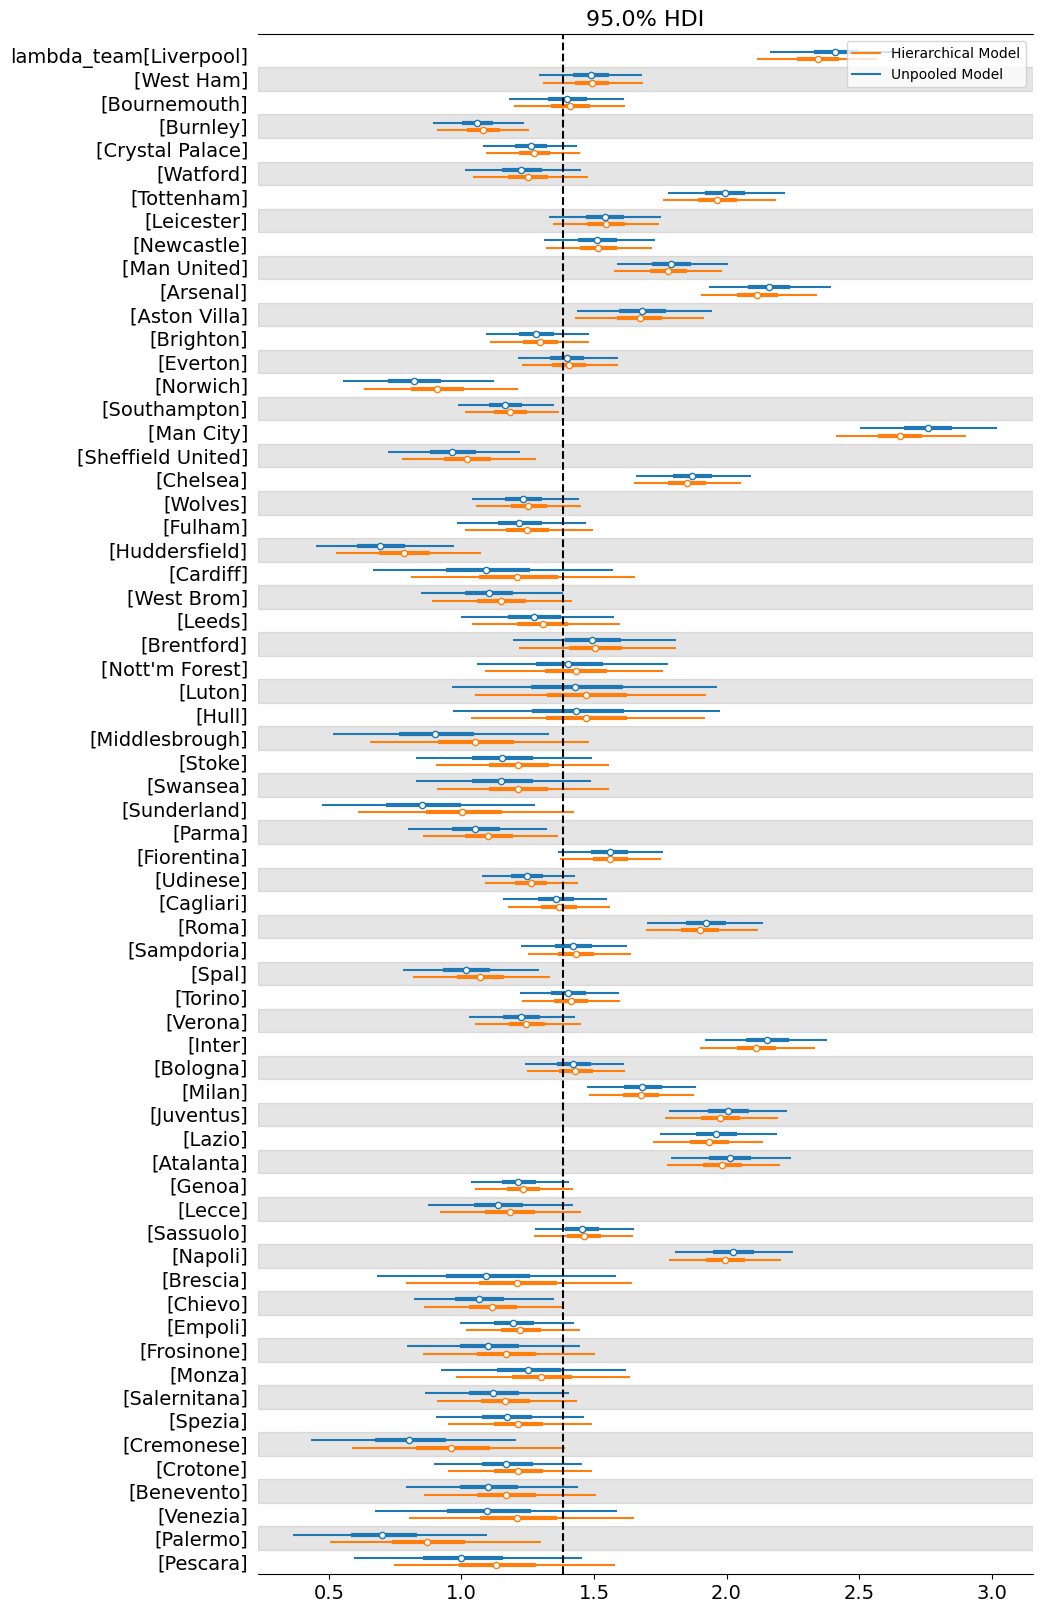

In [173]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

teams = data['HomeTeam'].unique()

unpooled_trace.posterior = unpooled_trace.posterior.assign_coords(mu_team_dim_0=teams)
hierarchical_trace.posterior = hierarchical_trace.posterior.assign_coords(mu_team_dim_0=teams)

lambda_values_unpooled = np.array([unpooled_trace.posterior[team].values for team in teams])
lambda_values_unpooled = np.transpose(lambda_values_unpooled, (1, 2, 0))  # Transpose to match dimensions

lambda_values_hierarchical = np.array([hierarchical_trace.posterior[f'lambda_{team}'].values for team in teams])
lambda_values_hierarchical = np.transpose(lambda_values_hierarchical, (1, 2, 0))  # Transpose to match dimensions

# Assign these to the posterior for the models
unpooled_trace.posterior["lambda_team"] = (("chain", "draw", "mu_team_dim_0"), lambda_values_unpooled)
hierarchical_trace.posterior["lambda_team"] = (("chain", "draw", "mu_team_dim_0"), lambda_values_hierarchical)

team_actual_goals = data.groupby('HomeTeam')['FTHG'].mean()

# Plot the forest for both the unpooled and hierarchical models with custom colors
ax = az.plot_forest(
    [unpooled_trace, hierarchical_trace],
    model_names=['Unpooled Model', 'Hierarchical Model'],  # Model names
    combined=True,  # Combine both models in one row
    var_names='lambda_team',  # Select variables for team-specific Poisson rates
    hdi_prob=0.95,
    figsize=(10, 20),
)

# Add a vertical line representing the grand mean (for illustration)
grand_mean = team_actual_goals.mean()  # Mean of observed goals (FTHG) for each team
plt.axvline(x=grand_mean, color='black', linestyle='--', label='Grand Mean')

plt.show()


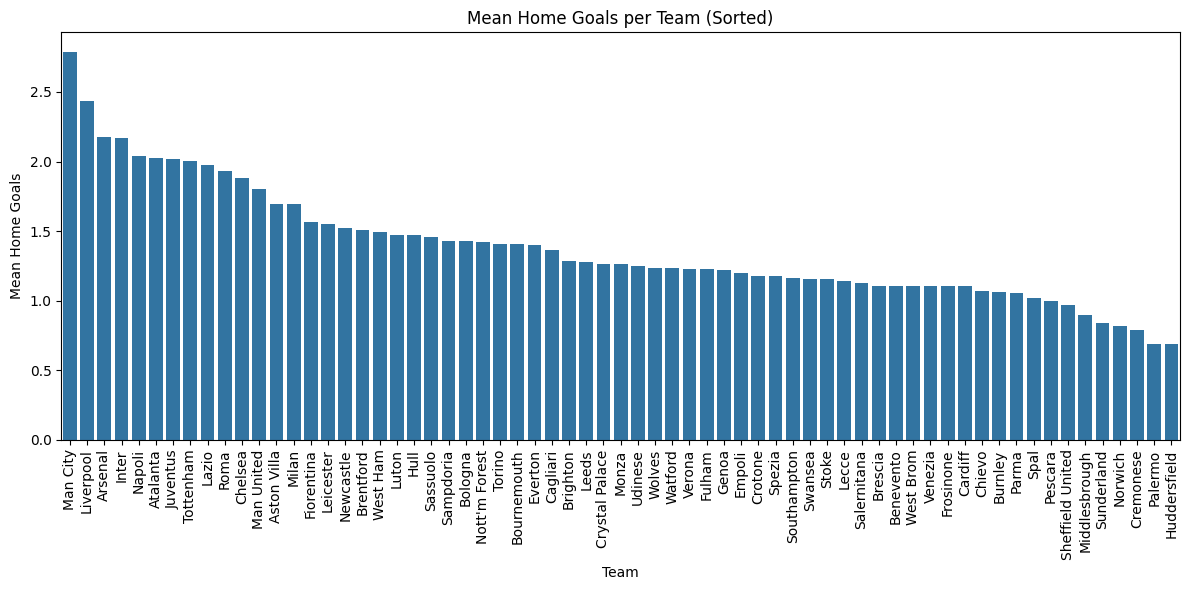

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in the previous code
team_mean_goals = data.groupby('HomeTeam')['FTHG'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=team_mean_goals.index, y=team_mean_goals.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Mean Home Goals')
plt.title('Mean Home Goals per Team (Sorted)')
plt.tight_layout()
plt.show()

## Now trying to insert Varese to the population and estimate form there

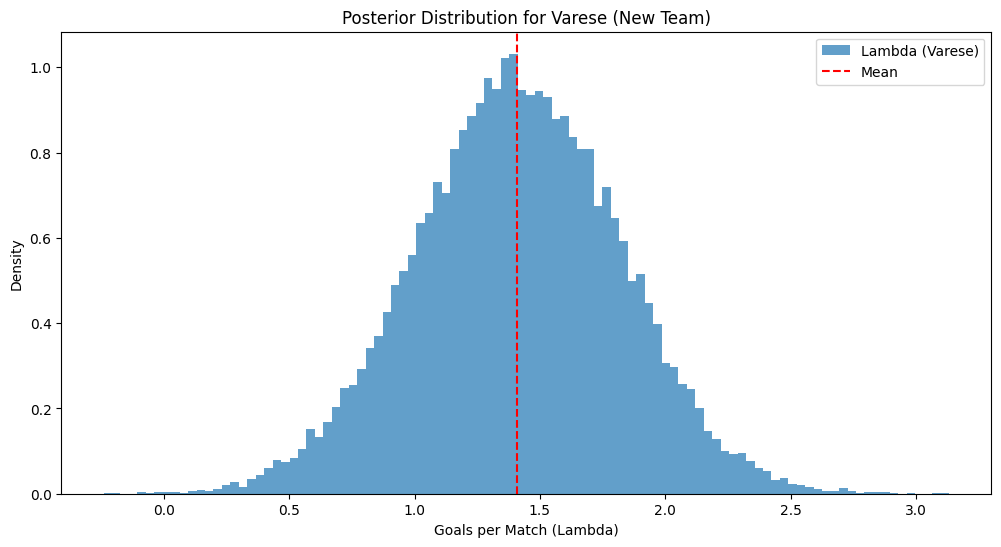

Posterior Summary for Varese:
Mean: 1.411
Standard Deviation: 0.408
95% HDI: [0.602, 2.204]


In [221]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

# Extract global posterior samples
mu_global_samples = hierarchical_trace.posterior['mu_global'].values.flatten()
sigma_global_samples = hierarchical_trace.posterior['sigma_global'].values.flatten()

# Generate a large number of posterior samples for "Varese"
num_samples = 20_000  # Large number of samples for robust estimation
lambda_varese_samples = np.random.normal(mu_global_samples, sigma_global_samples, size=num_samples)

# Plot the posterior distribution for "Varese"
plt.figure(figsize=(12, 6))
plt.hist(lambda_varese_samples, bins=100, density=True, alpha=0.7, label='Lambda (Varese)')
plt.axvline(np.mean(lambda_varese_samples), color='red', linestyle='--', label='Mean')
plt.title('Posterior Distribution for Varese (New Team)')
plt.xlabel('Goals per Match (Lambda)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Summarize the posterior distribution
mean_varese = np.mean(lambda_varese_samples)
std_varese = np.std(lambda_varese_samples)
hdi_2_5 = np.percentile(lambda_varese_samples, 2.5)
hdi_97_5 = np.percentile(lambda_varese_samples, 97.5)

print(f"Posterior Summary for Varese:")
print(f"Mean: {mean_varese:.3f}")
print(f"Standard Deviation: {std_varese:.3f}")
print(f"95% HDI: [{hdi_2_5:.3f}, {hdi_97_5:.3f}]")


Evaluating the models on Ac Milan team of Serie A

The comparison between the unpooled and hierarchical models for Milan's predicted home goals reveals that the hierarchical model provides more constrained estimates with a narrower uncertainty range, reflecting the pooling of information across teams.

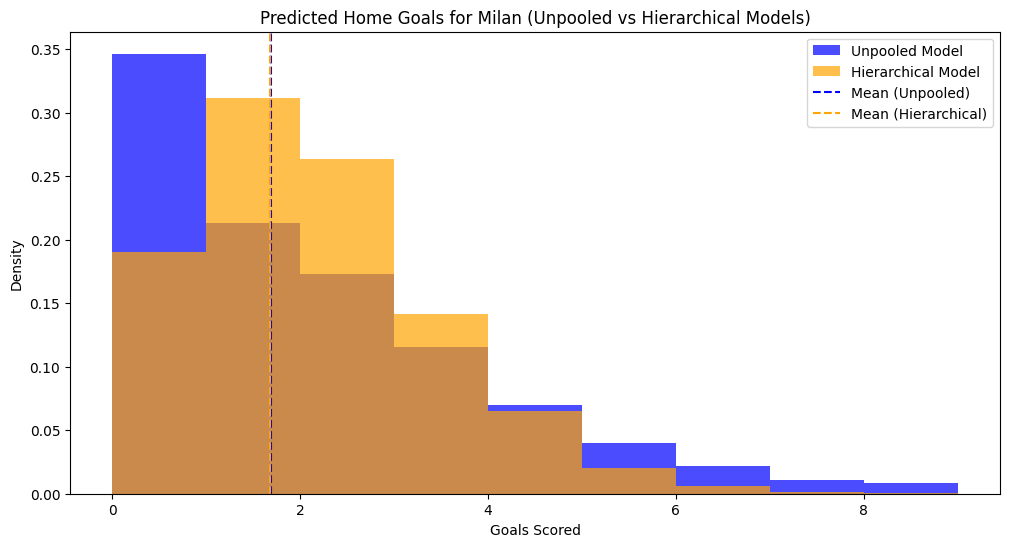

Unpooled Model Summary:
Mean: 1.685, Std: 1.839, 95% HDI: (0.0, 6.0)
Hierarchical Model Summary:
Mean: 1.675, Std: 1.303, 95% HDI: (0.0, 5.0)


In [235]:
import matplotlib.pyplot as plt
import numpy as np

# Extract posterior samples for Milan (unpooled model)
lambda_milan_unpooled_samples = posterior_predictive_unpooled["posterior_predictive"]['y_Milan'].values.flatten()

# Extract posterior samples for Milan (hierarchical model)
lambda_milan_hierarchical_samples = hierarchical_trace.posterior[f'lambda_Milan'].values.flatten()

# Simulate new observations for both models directly from the posterior samples
new_goals_unpooled = np.random.poisson(lambda_milan_unpooled_samples)
new_goals_hierarchical = np.random.poisson(lambda_milan_hierarchical_samples)

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.hist(new_goals_unpooled, bins=range(0, 10), alpha=0.7, density=True, label='Unpooled Model', color='blue')
plt.hist(new_goals_hierarchical, bins=range(0, 10), alpha=0.7, density=True, label='Hierarchical Model', color='orange')
plt.axvline(np.mean(new_goals_unpooled), color='blue', linestyle='--', label='Mean (Unpooled)')
plt.axvline(np.mean(new_goals_hierarchical), color='orange', linestyle='--', label='Mean (Hierarchical)')
plt.title('Predicted Home Goals for Milan (Unpooled vs Hierarchical Models)')
plt.xlabel('Goals Scored')
plt.ylabel('Density')
plt.legend()
plt.show()

# Summary statistics for both models
mean_unpooled = np.mean(new_goals_unpooled)
std_unpooled = np.std(new_goals_unpooled)
hdi_unpooled = (np.percentile(new_goals_unpooled, 2.5), np.percentile(new_goals_unpooled, 97.5))

mean_hierarchical = np.mean(new_goals_hierarchical)
std_hierarchical = np.std(new_goals_hierarchical)
hdi_hierarchical = (np.percentile(new_goals_hierarchical, 2.5), np.percentile(new_goals_hierarchical, 97.5))

print("Unpooled Model Summary:")
print(f"Mean: {mean_unpooled:.3f}, Std: {std_unpooled:.3f}, 95% HDI: {hdi_unpooled}")

print("Hierarchical Model Summary:")
print(f"Mean: {mean_hierarchical:.3f}, Std: {std_hierarchical:.3f}, 95% HDI: {hdi_hierarchical}")
